In [21]:
from koebe.algorithms.cvt import weightedCVT

import numpy as np
from PIL import Image
import random

# Open the cauchy.jpg grayscale image. If it weren't grayscale, we'd need to convert it.
im = Image.open("data/cauchy.jpg")
w, h = im.size # Get the current image size: 

# Scale the image up 5 times (at 200 x 277, my cauchy.jpg image leads to CVT cells 
# hitting size 0 and thus having an error)
im = im.resize((5*w, 5*h), Image.ANTIALIAS)
w, h = im.size

# Convert the image pixels to a numpy array. 
I = np.array(im)

# Convert to a float array and take the transpose so that 
# the first index is x-coordinate and the second index is y-coordinate
rho = np.array(im).astype(float).T

# Convert all the pixel values to densities where white pixels are density 1
# and black pixels are density 1 / 256
for i in range(w):
    for j in range(h):
        rho[i][j] = (256 - rho[i][j]) / 256

In [22]:
im.show()

In [6]:
# Generate 1000 random sites
sites = np.array([
    [int(random.random() * w), int(random.random() * h)]
    for _ in range(5000)
])

# Compute the weighted CVT of the sites
cvt_sites = weightedCVT(sites, rho)

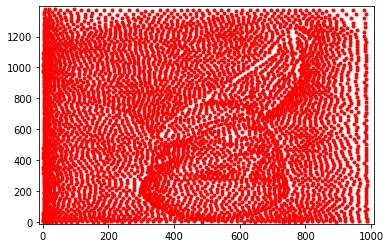

In [8]:
# Plot the sites: 
import matplotlib.pyplot as plt

plt.xlim(-10, w+10)
plt.ylim(-10, h+10)

# Note that the plot will be upside down since graphics positive y-direction
# points down, not up. 
plt.plot(*cvt_sites.T, 'r.')

plt.show()

In [16]:
cvt_sites

array([[ 656.55962337,  208.15421955],
       [ 894.45692794, 1061.91107704],
       [ 287.17599823,  333.1007809 ],
       ...,
       [  76.89491402, 1061.30751136],
       [ 886.39327643, 1183.39541779],
       [ 259.58849895,  567.8287717 ]])

In [20]:
from PIL import ImageDraw

im = Image.new(mode="L", size=(w, h), color=255)


imSamples = [(int(x), int(y))
              for x, y in cvt_sites]
#imSamples = [worldToImgPixelCoords(x, y, -1, 1, 2, 2, w, h)
#              for x, y in xySamples]

draw = ImageDraw.Draw(im)
for x, y in imSamples:
    draw.ellipse([(x - 2, y - 2), (x + 2, y + 2)], fill=0)
del draw

im.show()